# Problem Statement


This dataset contains attributes related to Irish flowers. Our aim is to use Logistic Regresssion with `PCA` to predict class.

PCA stands for `Principle Components Analysis`. This method transforms the features into the new space of same dimensions which show highest variance called `principle components`. The principle components are the linear combination of old features in such a way that they are ordered from highest to lowest variance explained. Here, we can drop the PCs which explain lower variance in the dataset and try to reduce the effort required while model training without significant loss of the information.

### Methodology

Model development is divided into multiple steps as mentioned below,
1. Data exploring and understanding: This step involves preliminary level data understanding and exploring.

2. Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis. 

3. Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.

4. Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type. Here we would also do PCA in order to reduce the feature space into smaller one.

5. Train-test split: This step involves spliting the dataset into train and test parts.

6. Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating hte model using relevant matrics.

7. Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Import Dependancies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Reading Dataset

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation,
- Data is having 4 feature columns and 1 class column.
- Data is having 150 entries without any null value.
- Dtype for feature columns is flaot64.

## 1. Data Exploration and Understanding

<AxesSubplot:xlabel='sepal_length'>

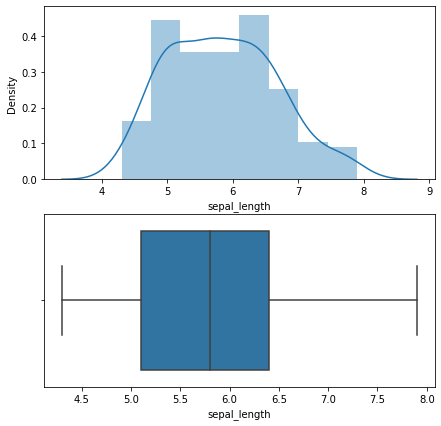

In [5]:
# sepal_length: length of sepal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.sepal_length)
plt.subplot(2,1,2)
sns.boxplot(data.sepal_length)

- Sepal length is having range from 4 to 8. 
- The median value for sepal length is 5.8 units. 
- We don't observe any outlier in the sepal length.

<AxesSubplot:xlabel='sepal_width'>

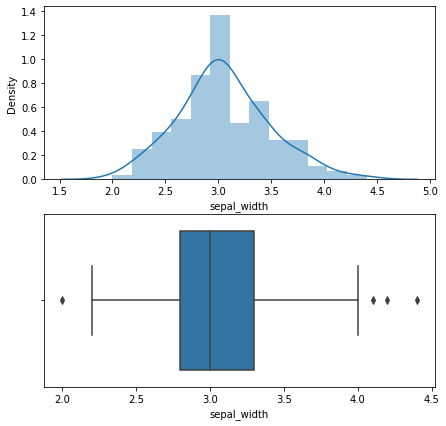

In [6]:
# sepal_width: width of sepal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.sepal_width)
plt.subplot(2,1,2)
sns.boxplot(data.sepal_width)

- Sepal width is having range from 1.5 to 5. 
- The median value for sepal width is 3 units. 
- We can see few outliers in the sepal width on both sides.

<AxesSubplot:xlabel='petal_length'>

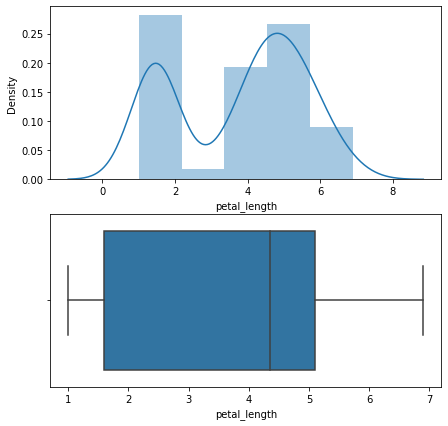

In [7]:
# petal_length: length of petal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.petal_length)
plt.subplot(2,1,2)
sns.boxplot(data.petal_length)

- petal length is having range from 1.5 to 7.
- The median value for petal length is 4.5 units.
- The distribution of petal length is not normal. 

<AxesSubplot:xlabel='petal_width'>

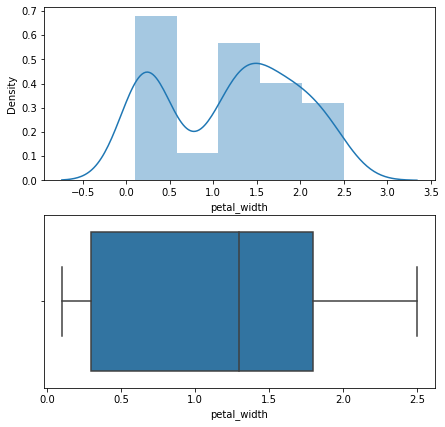

In [8]:
# petal_width: width of petal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.petal_width)
plt.subplot(2,1,2)
sns.boxplot(data.petal_width)

- petal width is having range from 0.2 to 2.5.
- The median value for petal width is 1.3 units.
- The distribution of petal width is not normal.

In [9]:
# Species

data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

- There are three classes in species variable.
- Class distribution in uniform.

## 2. Data Cleaning

The data is already clean and clear. Hence, we do not need any form of data cleaning step here.

## 3. Data Visualization

<AxesSubplot:>

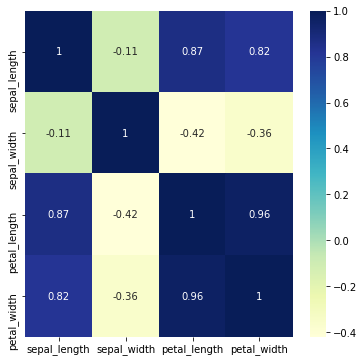

In [10]:
# Pearson's correlation

# heatmap
plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

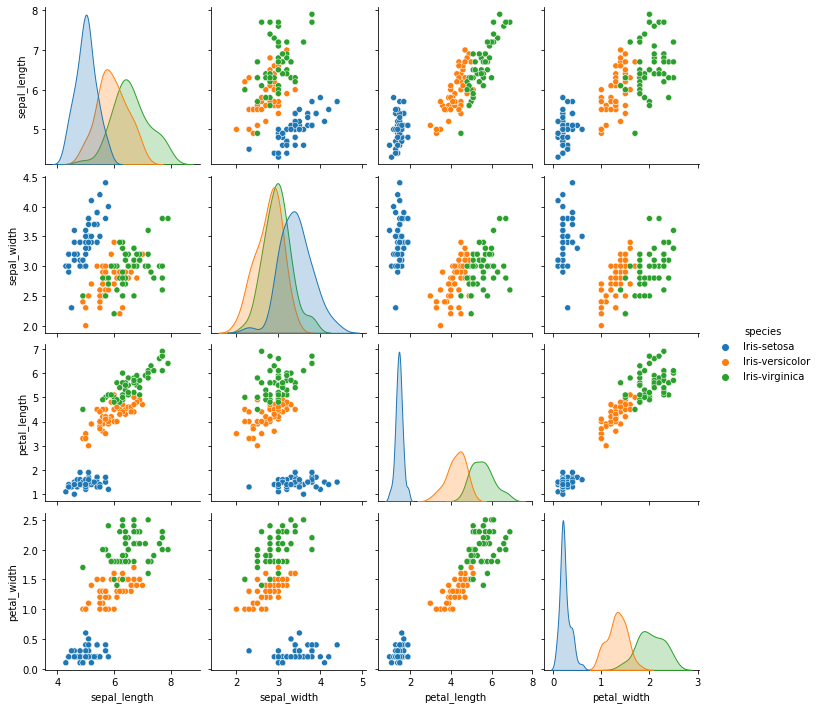

In [11]:
# pairplot: Visualizing scatter plot between numeric columns

sns.pairplot(data, hue='species')

Observations,
- petal_length and petal_width are having very high correlation of 0.96.
- sepal_width is having negative correlation with sepal_length, petal_length and petal_width.
- Similar correlation can be observed in pairplot as well.

## 4. Data Preparation

In [12]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
# mapping species column to integer values

data.species = data.species.map({'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2})

In [14]:
# splitting into X and y

X = data.drop('species', axis=1)
y = data['species'].astype('int64')

## 5. Train-Test split

In [15]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 100)

#### Scaling the features

In [16]:
# Minmax scaling

# instantiating the scalers
scaler_X = StandardScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), index=X_test.index, columns=X_test.columns)

In [17]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-9.880985e-16,-1.295260e-16,9.992007e-17,-1.332268e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.861750e+00,-2.426168e+00,-1.591349e+00,-1.460636e+00
25%,-8.615934e-01,-5.702946e-01,-1.256072e+00,-1.191807e+00
50%,-1.114758e-01,-1.063261e-01,3.036925e-01,1.523362e-01
75%,6.698967e-01,5.896266e-01,7.993187e-01,8.244078e-01
max,2.638955e+00,2.677485e+00,1.732262e+00,1.765308e+00


In [18]:
X_test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,0.338595,0.094727,0.086006,0.080649
std,1.128572,1.026194,1.137649,1.123889
min,-1.361672,-1.962200,-1.416422,-1.460636
25%,-0.674064,-0.512299,-1.241495,-1.158203
50%,0.451112,-0.106326,0.478619,0.219543
75%,1.107465,0.705619,1.003400,1.059633
max,2.388916,3.141453,1.848880,1.496479


### PCA

In [19]:
# Instantiating PCA for numeric columns in X_train/X_test
pca = PCA()

pca.fit(X_train)

PCA()

<AxesSubplot:xlabel='n_features', ylabel='cum_variance'>

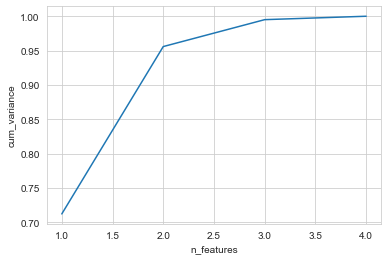

In [20]:
# Checking cumulative explained variance

exp_var = pd.DataFrame(np.concatenate((np.arange(1,pca.explained_variance_ratio_.shape[0]+1).reshape(-1,1),
                                       np.cumsum(pca.explained_variance_ratio_).reshape(-1,1)), axis=1),
                                        columns=['n_features', 'cum_variance'])

sns.set_style("whitegrid")
sns.lineplot(x=exp_var.n_features, y=exp_var.cum_variance)

It can be observed that cumulative variance of ~95% from data can be explained by using first 2 PCs. Here, we would try fixating required variance to 95% and let the algorithm automatically select the number of features.

In [21]:
# transforming data to explain 95% variance in it

pca1 = PCA(n_components=0.95)
X_train_pca = pd.DataFrame(pca1.fit_transform(X_train), index=X_train.index)
X_train_pca.columns=["PC_"+str(i) for i in range(1, X_train_pca.shape[1]+1)]
print(X_train_pca.shape)

X_train_pca.head()

(120, 2)


,PC_1,PC_2
81,-0.000993,-1.533504
99,0.285974,-0.566105
119,1.262853,-1.712188
12,-2.258165,-0.602571
16,-2.145105,1.627653


In [22]:
X_test_pca =  pd.DataFrame(pca1.transform(X_test), index=X_test.index)
X_test_pca.columns=["PC_"+str(i) for i in range(1, X_test_pca.shape[1]+1)]
print(X_test_pca.shape)

X_test_pca.head()

(30, 2)


,PC_1,PC_2
128,1.874187,-0.207793
11,-2.324662,0.263352
118,3.432208,-0.030951
15,-2.144658,2.842888
123,1.391043,-0.482194


#### Data Vizualization after PCA

<AxesSubplot:xlabel='PC_1', ylabel='PC_2'>

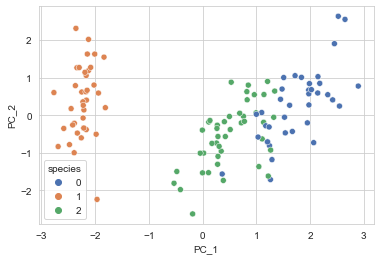

In [23]:
# vizualize

viz_df = pd.concat([X_train_pca, y_train], axis=1)
sns.scatterplot(x='PC_1', y='PC_2', hue='species', data=viz_df, palette='deep')

Three separate classes are clearly visible with the help of just two PCs. Hence, PCA is quite helpful in this case.

## 6. Model Development - Validation and Evaluation

In [24]:
# Logistic Regression classifier

model = LogisticRegression()

model.fit(X_train_pca, y_train)

LogisticRegression()

In [25]:
# Making prediction

y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

#### Accuracy comparison between Train and Test sets

In [26]:
# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))

Train accuracy: 0.93
Test accuracy: 0.93


It can be observed that both train and test accuracies are same and high. Hence model is performing good on the dataset.

#### Confusion Matrix

Text(0.5, 1.0, 'Test set')

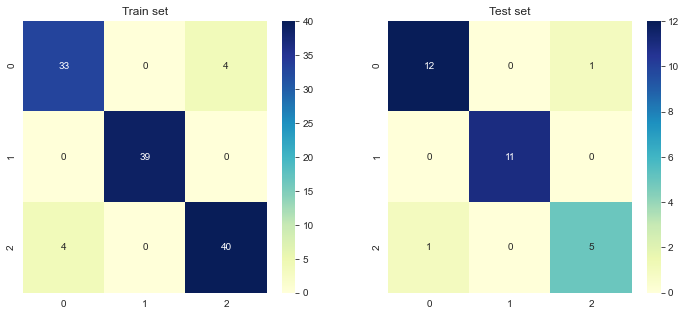

In [27]:
# confusion matrix: train  and test sets

plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax1.set_title('Train set')


ax2 = plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax2.set_title('Test set')

Confusion matrix shows 8 misclassification on train set and 2 on test set.

#### Classification report

- Classification report shows derived parameters from confusion matrix viz precision, recall, f-score and support(true occurence belong to the class) for each sub-class.
- It also includes corresponding macro and weghted average values as well. 

In [28]:
# classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       1.00      1.00      1.00        39
           2       0.91      0.91      0.91        44

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



Observations as per classification report,
- f1-score summarizes both precision and recall scores. f1 values are acceptable for each class.
- macro and weighted average for all the class is 0.89 which is good.

In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      1.00      1.00        11
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



## 7. Conclusion

- PCA can help reducing the number of features without any intervention and helps reducing computations efforts to be put while model training.
- Model performance after PCA is good.


------